In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

df = pd.read_csv("data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# Fill in the missing values (11) for Postal Code attribute and store them as int64 type

df["Postal Code"] = df["Postal Code"].fillna(0).astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Check for any duplicate rows (None Found!)

df.duplicated().sum()

np.int64(0)

In [7]:
# Type of Customers and their respective counts

df.Segment.value_counts().reset_index().rename(columns={"Segment": "Customer Type"})

,Customer Type,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


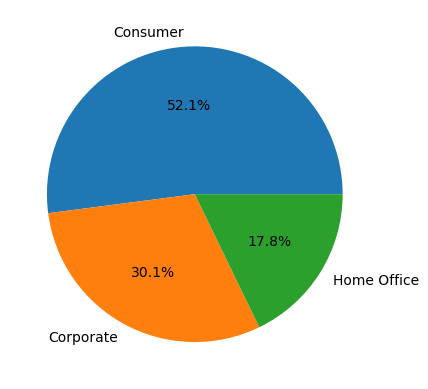

In [8]:
# Plot the customer distribution on a pie chart

import matplotlib.pyplot as plt
plt.pie(df.Segment.value_counts().values, labels=df.Segment.unique(), autopct="%1.1f%%");

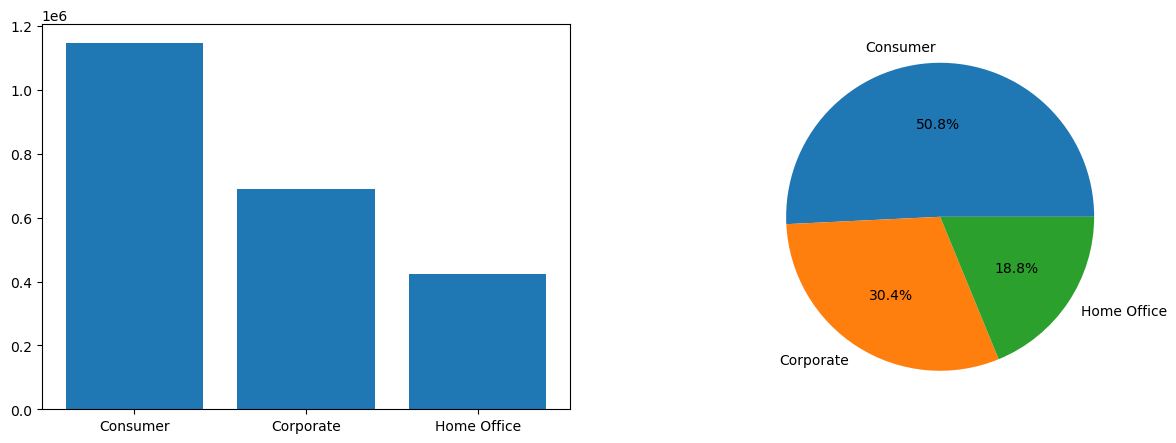

In [9]:
# Plot the distribution of Sales by Customer Type

sales = df.groupby("Segment").Sales.sum().reset_index() # .apply(lambda x: "%.5f" % x).reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plt.bar(sales["Segment"], sales["Sales"]);
ax1.bar(sales["Segment"], sales["Sales"])
ax2.pie(sales["Sales"], labels=sales["Segment"], autopct="%1.1f%%");

## A Deeper Analysis

Computing metrics like Customer Lifetime Value (CLTV), Customer Acquisition Cost (CAC), etc. for each segment can surface insights on which segment to focus on.

In [10]:
# Finding out most loyal customers

df["Customer Name"].value_counts().head(3).reset_index()

,Customer Name,count
0,William Brown,35
1,Paul Prost,34
2,Matt Abelman,34


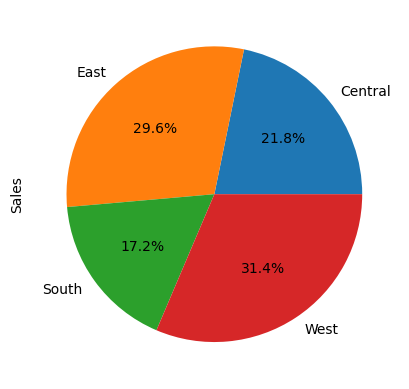

In [11]:
df.groupby("Region").Sales.sum().plot(kind="pie", autopct="%1.1f%%");

<Axes: ylabel='Sales'>

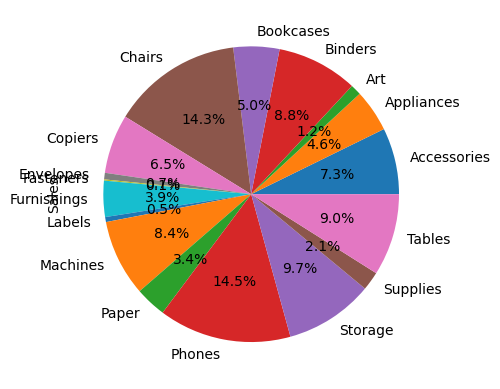

In [12]:
df.groupby("Sub-Category").Sales.sum().plot(kind="pie", autopct="%1.1f%%")

# Customer Analysis

In [13]:
df["Customer Name"].value_counts().head()

Customer Name
William Brown       35
Paul Prost          34
Matt Abelman        34
John Lee            33
Jonathan Doherty    32
Name: count, dtype: int64

In [14]:
# Top Repeating Customers

# Group-by     ->       Customer-info           ->          Count Orders            ->          Rename column to denote total orders    ->      Sort Orders in descending order   
df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index().rename(columns={"Order ID": "Total Orders"}).sort_values(by="Total Orders", ascending=False).head()

,Customer ID,Customer Name,Segment,Total Orders
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32


In [15]:
# Top spending customers
df.groupby(["Customer ID", "Customer Name", "Segment"])["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(5)

,Customer ID,Customer Name,Segment,Sales
700,SM-20320,Sean Miller,Home Office,25043.050
741,TC-20980,Tamara Chand,Corporate,19052.218
621,RB-19360,Raymond Buch,Consumer,15117.339
730,TA-21385,Tom Ashbrook,Home Office,14595.620
6,AB-10105,Adrian Barton,Consumer,14473.571


# Shipping Analysis

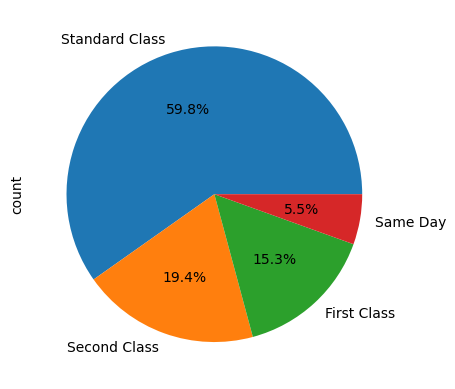

In [16]:
# Most popular shipping mode
df["Ship Mode"].value_counts().plot.pie(autopct='%1.1f%%');
# df.groupby(["Ship Mode"])["Sales"].sum().plot.pie(autopct='%1.1f%%')

# Geographical Analysis

Text(0.5, 1.0, 'Top 15 by Fine Grouping (Sales)')

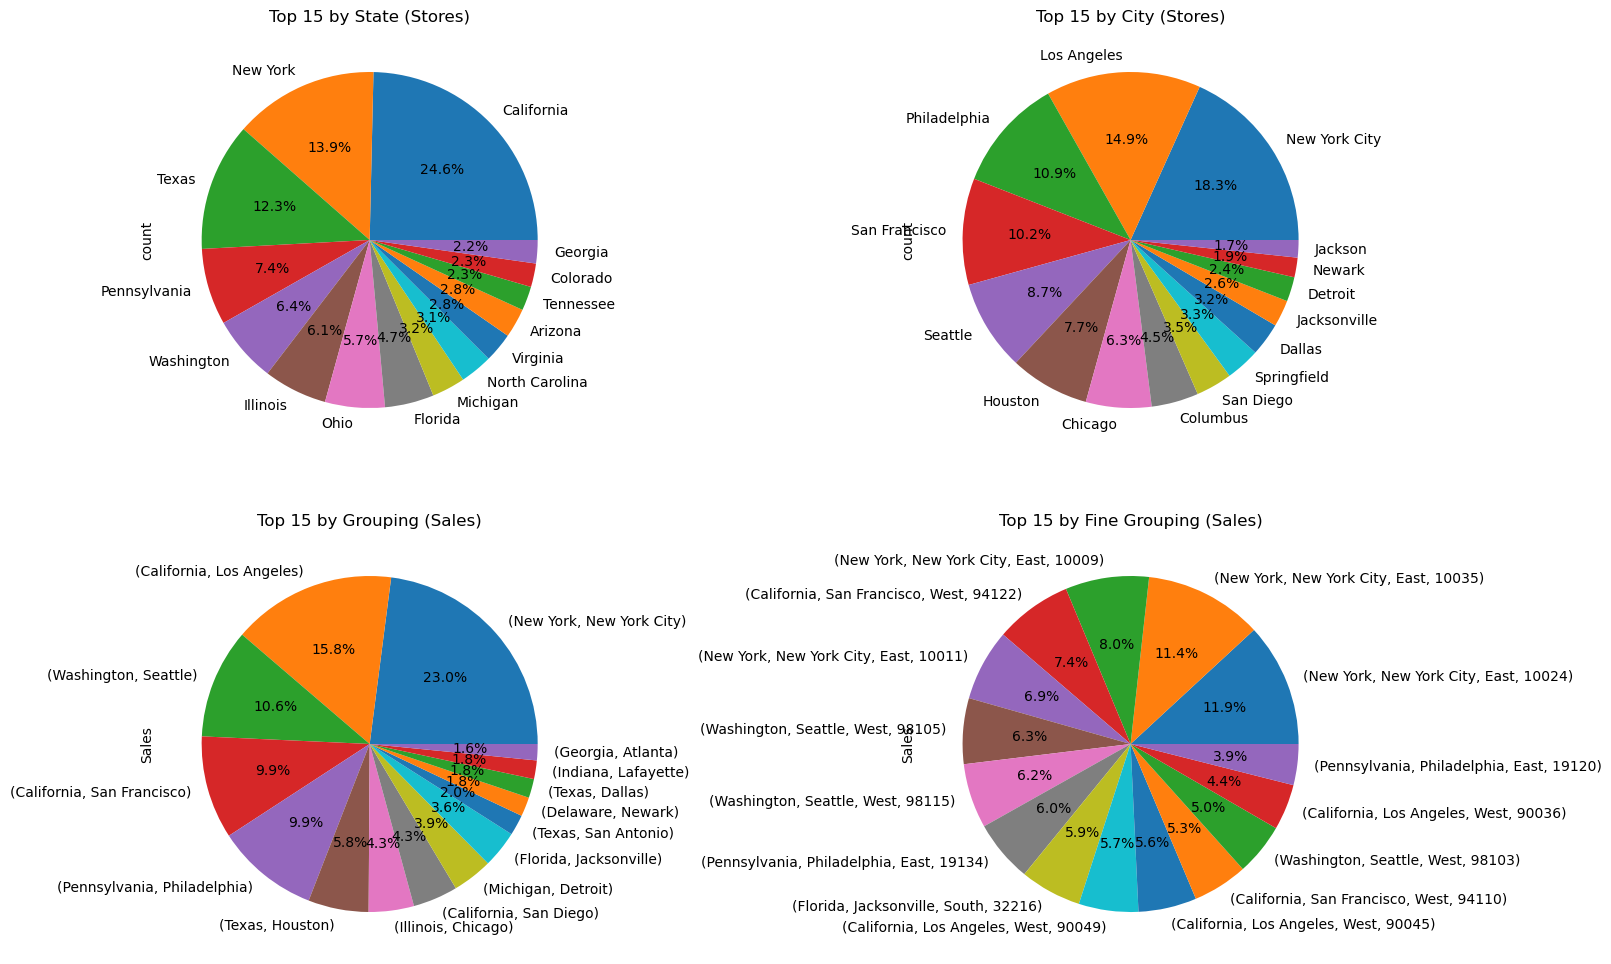

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

df.State.value_counts().head(15).plot.pie(ax=ax[0, 0], autopct='%1.1f%%');
ax[0, 0].set_title("Top 15 by State (Stores)")

df.City.value_counts().head(15).plot.pie(ax=ax[0, 1], autopct='%1.1f%%');
ax[0, 1].set_title("Top 15 by City (Stores)")

df.groupby(["State", "City"]).Sales.sum().sort_values(ascending=False).head(15).plot.pie(ax=ax[1, 0], autopct='%1.1f%%');
ax[1, 0].set_title("Top 15 by Grouping (Sales)")

df.groupby(["State", "City", "Region", "Postal Code"])["Sales"].sum().sort_values(ascending=False).head(15).plot.pie(ax=ax[1, 1], autopct='%1.1f%%');
ax[1, 1].set_title("Top 15 by Fine Grouping (Sales)")

# Product Analysis

In [18]:
df.Category.unique(), df["Sub-Category"].unique()

(array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
 array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
        'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
        'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
        'Copiers'], dtype=object))

In [19]:
df.groupby(["Category"])["Sub-Category"].nunique().reset_index()

,Category,Sub-Category
0,Furniture,4
1,Office Supplies,9
2,Technology,4


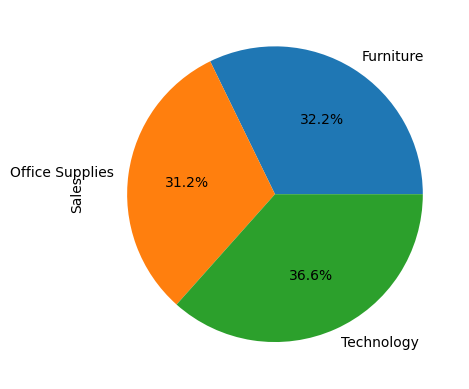

In [20]:
df.groupby(["Category"]).Sales.sum().plot.pie(autopct='%1.1f%%');

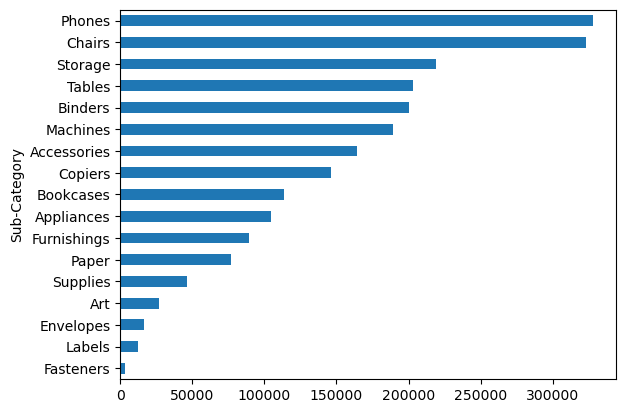

In [21]:
df.groupby(["Sub-Category"]).Sales.sum().sort_values().plot.barh();

# Sales Analysis

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


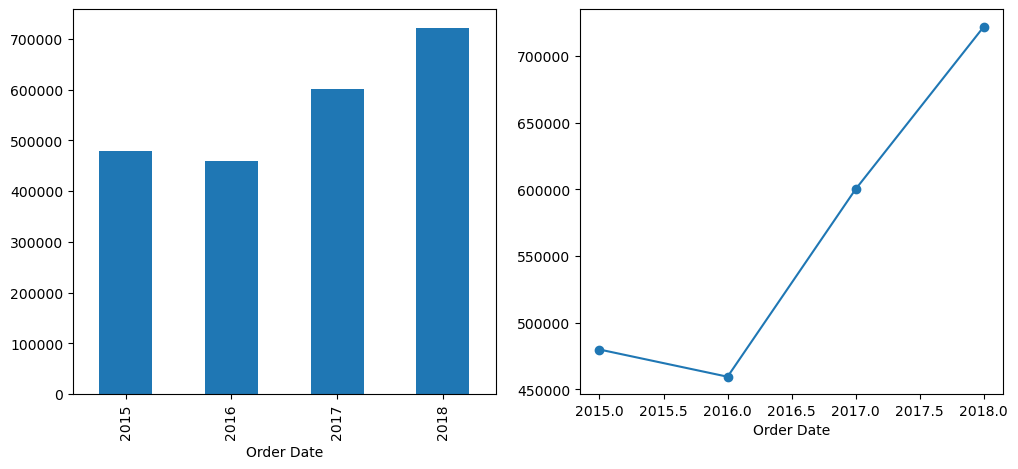

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df.groupby(df['Order Date'].dt.year).Sales.sum().plot.bar(ax=ax[0]);

df.groupby(df['Order Date'].dt.year).Sales.sum().plot(marker='o', ax=ax[1]);

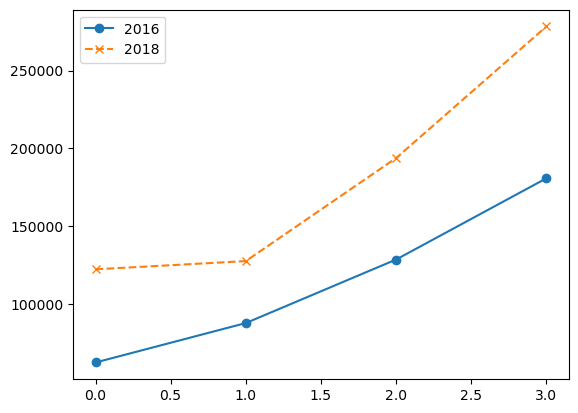

In [24]:
sales_2016, sales_2018 = df[df['Order Date'].dt.year == 2016], df[df['Order Date'].dt.year == 2018]

sales_2016.resample('QE', on='Order Date').Sales.sum().reset_index(drop=True).plot(marker='o', linestyle='-');
sales_2018.resample('QE', on='Order Date').Sales.sum().reset_index(drop=True).plot(marker='x', linestyle='--');
plt.legend(['2016', '2018'])

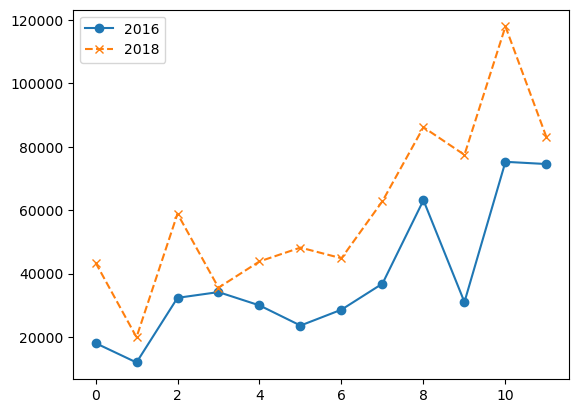

In [25]:
sales_2016.resample('ME', on='Order Date').Sales.sum().reset_index(drop=True).plot(marker='o', linestyle='-')
sales_2018.resample('ME', on='Order Date').Sales.sum().reset_index(drop=True).plot(marker='x', linestyle='--')
plt.legend(['2016', '2018'])

In [26]:
import plotly.express as px

px.sunburst(
    df.groupby(['Category', 'Sub-Category']).Sales.sum().reset_index(),
    path=['Category', 'Sub-Category'],
    values='Sales'
)

In [27]:
px.treemap(
    df.groupby(['Category', 'Ship Mode', 'Sub-Category']).Sales.sum().reset_index(),
    path=['Category', 'Ship Mode', 'Sub-Category'],
    values='Sales'
)